# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 7 - MonteCarlo Simulation</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



In questa esercitazione risolveremo lo stesso problema introdotto nell'esercitazione 4, utilizzando un algoritmo MonteCarlo, più precisamente utilizzando un algoritmo di Metropolis  

All'interno del codice utilizzeremo i
`iNVET = 0` per utilizzare il metodo Monte Carlo. 

La funzione `Move()` è la funzione che all'interno del codice definisce l'evoluzione del sistema. In questa esercitazione la funzione svolge un algoritmo di Metropolis per la definizione dell'evolusione del sistema. 





Si parte da una configurazione casuale delle particelle del sistema, nel nostro caso i 108 atomi di Argon. 
Si procede quindi a generare una nuova configurazione a partire da quella iniziale: ad ogni ciclo si estrae una particella, e si calcola l'energia corrispondente da utilizzare per il calcolo del fattore di boltzmann. 
Si calcola una nuova posizione, a partire dalla precedente, variando di un delta la posizione di partenza (delta è un valore preso in input e influisce sulla definizine dell'acceptance rate - Spiegazione sul significato di delta - )

- Si calcola la nuova energia corrispondente alla nuova posizione e si determina il fattore di boltzman. 
- Si estrae un numero e se esso è minore della probabilità di blotzmann, allora si modifica la posizione della particella, altrimenti si tiene la posizione precedente. 



# Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

## Soluzione

In questo esercizio si tiene in considerazione di una correzione sull'energia che si osserva considerando un'andamento non nullo per $r > r_{cut}$. 

Spesso per valutare questo valore di assume che la distribuzione g(r) in questa zona sia $g(r) \approx 1$

In generale il calcolo della correzione si calcola 
$$
\langle V \rangle = 2\pi\rho N \int_{r_C}^{+\infty} dr g(r)r^2 4\epsilon \bigg[ \bigg(  \frac{\sigma}{r}\bigg)^{12} - \bigg(  \frac{\sigma}{r}\bigg)^{6}\bigg]= N 8\pi\rho\epsilon \int_{r_C}^{+\infty} dr g(r)r^2 \bigg[ \bigg(  \frac{\sigma}{r}\bigg)^{12} - \bigg(  \frac{\sigma}{r}\bigg)^{6}\bigg]
$$

Nota g(r) questo integrale può esser valutato calando l'integrale per importance sampling ponendo $f(r) = r^2 \bigg[ \bigg(  \frac{\sigma}{r}\bigg)^{12} - \bigg(  \frac{\sigma}{r}\bigg)^{6}\bigg]
$ e quindi valutando l'integrale nella forma 

$ 8\pi\rho\epsilon \int_{r_C}^{+\infty} dr g(r) f(r)$

Nel caso specifico in cui $g(r)\approx 1$ si ottiene 
$$\frac{\langle V \rangle}{N} =\frac{8\pi \rho\epsilon}{9r_c^9} - \frac{8\pi\rho\epsilon}{3r_c^3} $$

Per la correzione sulla pressione si può procedere analogamente 

$$
\frac{\langle w \rangle}{3N\epsilon} = \frac{2\pi\rho }{3} \int_{r_C}^{+\infty} dr g(r)r^2 48 \bigg[ \bigg(  \frac{\sigma}{r}\bigg)^{12} -\frac{1}{2} \bigg(  \frac{\sigma}{r}\bigg)^{6}\bigg]=  8\pi\rho\epsilon \int_{r_C}^{+\infty} dr g(r)r^2 \bigg[ \bigg(  \frac{\sigma}{r}\bigg)^{12} - \bigg(  \frac{\sigma}{r}\bigg)^{6}\bigg]
$$

Che nel caso di $g(r) \approx 1$ vale 

$$
\frac{\langle w \rangle}{3N\epsilon} = \frac{32\pi\rho}{3}\bigg[ \bigg(  \frac{1}{9r^9}\bigg) - \bigg(  \frac{1}{6r^3}\bigg)\bigg]$$

Si osserva che le correzioni sono stimabili sin da subito, qunidi all'interno del codice sono valutate all'interno della funzione `Input()`

# Exercise 07.2
Utilizzare il codice MD/MC per stampare valori istantanei di energia potenziale per particella $U/N$, su M simulazioni Monte Carlo **equilibrate** ( con $M=5\times 10^5$ e dove l'acceptance rate di Metropolis è fissato intorno a 50%) nelle seguenti condizioni termodinamiche:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. Una volta prodotti i dati, mostriamo dei plot delle funzioni di autocorrelazione di $U/N$ per stimare approssimativamente quanto larghi devono essere i blocchi della simulazione.
2. Usare gli stessi dati per studiare con uno script python, la stima per l'incertezza statistica del valore di aspettazione $U/N$ per diverse dimensioni dei blocchi nella tecnica del data blocking da $L=M/N=10$ a $L=5\times 10^3$, con $N$ il number di blocchi. Produrre dei grafici dell'incertezza statistica come funzione di $L$. What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

## Soluzione
### Algoritmo di Metropolis

### Valutazione dell'acceptance rate 

Si valuta che per poter eliminare il bias temporale è necessario modificare il parametro delta in modo tale che l'acceptance rate sia fissato a circa $50%$. Si può infatti dimostrare che imponendo il valore di acceptance Rate intorno al 50%, si garantisce ---

### Risultati 




A differenza dell'esercitazione 4 in cui il sistema è stato fatto evolvere utilizzando i metodi della dinamica molecolare, in questo caso viene utilizzato l'algoritmo di Metropolis.

Il problema di una simulazione che utilizza l'algoritmo di Metropolis è la correlazione tra gli stati consecutivi del sistema.

Per poter lavorare con dati non correlati suddivido in blocchi la simulazione per cui, i valori delle grandezze fisiche istantanee vengono utilizzati per fare una media sull'intero blocco. Scegliendo in maniera opportuna la dimensione del blocco i dati risultano non correlati.


## Soluzione

Partiamo con la definizione dei parametri iniziali che ci permettono di ottenere un acceptance rate di ciascuna fase. 
Dalla prima valutazione troviamo:
- fase solida -> acceptance rate  = 0.25
- fase liquida -> acceptance rate = 0.38
- fase gas -> acceptance rate = 0.93

La fase gas ha dei valori già accettabili, modifichiamo invece i parametri di input per la fase solida e liquida 

Dopo alcuni test troviamo un valore adeguato di delta di metropolis di 
- 0.11 per la fase solida 
- 0.20 per la fase liquida 
- 100 per la fase gassosa 

Avendo trovato questi valori utilizziamoli per stampare i valori preliminari istantanei di energia potenziale. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading of values form files 
x_epot_solid_0, epot_solid_0 = np.loadtxt("Esercise_7.1_7.2/pre_pot_solid.dat", usecols=(0, 1), unpack='true')
x_epot_liquid_0, epot_liquid_0  = np.loadtxt("Esercise_7.1_7.2/pre_pot_liquid.dat", usecols=(0, 1), unpack='true')
x_epot_gas_0, epot_gas_0  = np.loadtxt("Esercise_7.1_7.2/pre_pot_gas.dat", usecols=(0, 1), unpack='true')

x_epot_solid, epot_solid = np.loadtxt("Esercise_7.1_7.2/pot_solid_corr.dat", usecols=(0, 1), unpack='true')
x_epot_liquid, epot_liquid  = np.loadtxt("Esercise_7.1_7.2/pot_liquid_corr.dat", usecols=(0, 1), unpack='true')
x_epot_gas, epot_gas  = np.loadtxt("Esercise_7.1_7.2/pot_gas_corr.dat", usecols=(0, 1), unpack='true')


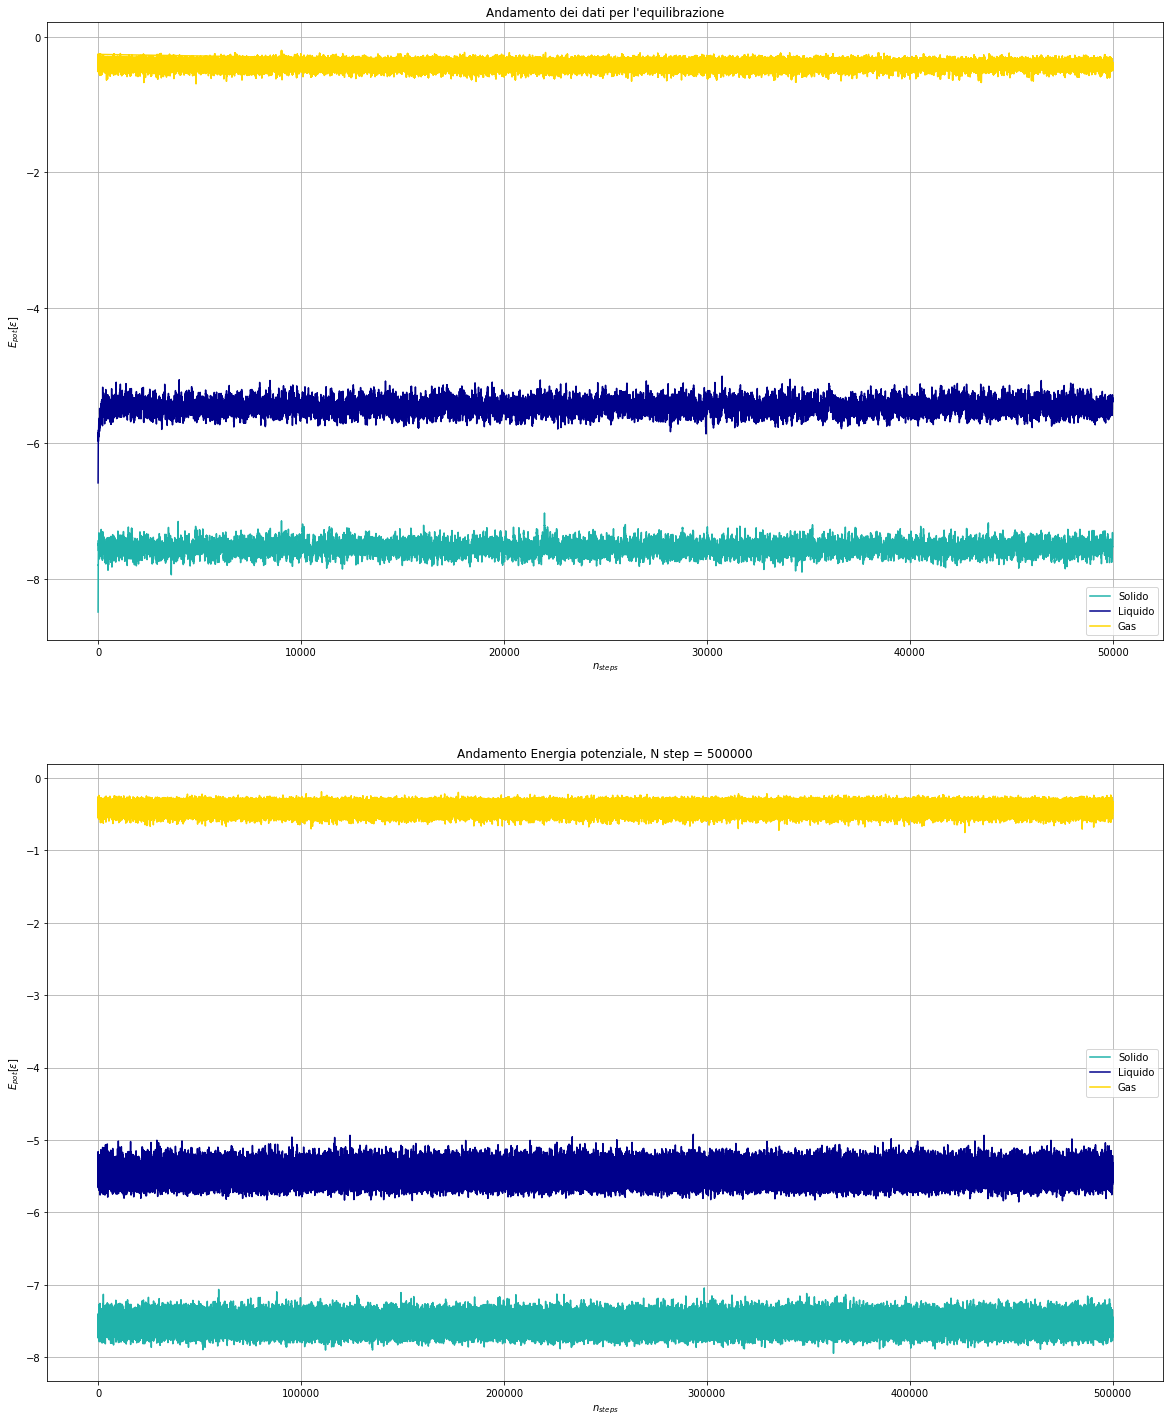

In [143]:
fig, ax = plt.subplots(2, 1, figsize=(20, 25))
title = "Andamento Energia potenziale, N step = " + str(x_epot_solid.size)

ax[0].plot(x_epot_solid_0, epot_solid_0, color = "lightseagreen", label = "Solido")
ax[0].plot(x_epot_liquid_0, epot_liquid_0, color = "darkblue", label = "Liquido")
ax[0].plot(x_epot_gas_0, epot_gas_0, color = "gold", label = "Gas")
ax[0].set_ylabel('$E_{pot} [\epsilon]$')
ax[0].set_xlabel('$n_{steps}$')
ax[0].legend()
ax[0].set_title ("Andamento dei dati per l'equilibrazione")
ax[0].grid()

ax[1].plot(x_epot_solid, epot_solid, color = "lightseagreen", label = "Solido")
ax[1].plot(x_epot_liquid, epot_liquid, color = "darkblue", label = "Liquido")
ax[1].plot(x_epot_gas, epot_gas, color = "gold", label = "Gas")
ax[1].set_ylabel('$E_{pot} [\epsilon]$')
ax[1].set_xlabel('$n_{steps}$')
ax[1].legend()
ax[1].set_title (title)
ax[1].grid()





## Funzione di Autocorrelazione


La funzine di autocorrelazione è definita 
$$
\chi (t) = \frac{\langle U(t')U(t'+t)\rangle_{t'} - \langle U(t')\rangle \langle U(t +t')\rangle}{\sigma_U^2}
$$

dove per una serie di valori di $U$ in funzione del tempo $t$ su un intervallo$[0, t_{max}]$ si ha 

$$
\langle U(t')U(t'+t)\rangle_{t'} = \frac{1}{(t_{max} -t)} \sum_{t'=0}^{t_{max}-t}U(t')U(t+t')
$$

$$\langle U(t') \rangle \langle U(t'+t)\rangle = \frac{1}{(t_{max} -t)^2} \sum_{t'=0}^{t_{max}-t}U(t')\sum_{t'=0}^{t_{max}-t}U(t+t') $$

$$
\sigma_{U}^2 =\frac{1}{(t_{max})} \sum_{t'=0}^{t_{max}}(U(t'))^2 - \bigg(\frac{1}{(t_{max})} \sum_{t'=0}^{t_{max}}U(t') \bigg)^2
$$

In [144]:
def auto_corr_calc(x, tmax):
    corr = []
    for t0 in range (tmax) :
        times = np.arange(0, x.size - t0, 1)
        prod = 0.
        for t in times: # per i tempi successivi
            prod += (x[t]*x[t0+t])
        prod/=times.size
        corr_value = (prod - (np.mean(x))**2)/(np.std(x))
        corr.append(corr_value)
    return corr

In [145]:
auto_corr_solid =  auto_corr_calc (epot_solid, 500)
auto_corr_liquid = auto_corr_calc (epot_liquid, 500)
auto_corr_gas = auto_corr_calc (epot_gas, 500)

In [146]:
t_max = np.linspace(0, 500, 500)

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
title = "Autocorrelazine" 
ax.plot(t_max, auto_corr_solid, color = "lightseagreen", label = "Solido")
ax.plot(t_max, auto_corr_liquid, color = "darkblue", label = "Liquido")
ax.plot(t_max, auto_corr_gas, color = "gold", label = "Gas")
ax.set_xlabel('$t$')
ax.set_ylabel('$\csi(t)$')
#ax.hlines(np.exp(-2),0,max(len(auto_corr_gas),len(auto_corr_liquid),len(auto_corr_solid)),color="red",linestyle="dashed",label=r"$e^{-2}$")
ax.legend()
ax.set_title (title)
ax.grid()

ValueError: 
\csi(t)
^
Unknown symbol: \csi, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x576 with 1 Axes>

Vediamo quindi che una dimensione dei blocchi adeguata è data da almento 300 step 

### Exercise 7.2.2
Studiamo la stima dell'incertezza statistica del valore di aspettazione di U/N per diverse dimensioni di blocchi, da $L=M/N=10$ a $L=5\times 10^3$, being $N$ the number of blocks. Produciamo un plot dell'andamento dell'incertezza statistica in funzione di $L$

What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [149]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [150]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

In [151]:
M = epot_solid.size
# lenght = np.array([10, 50, 100, 200, 400, 500, 800, 1000])
Ls = np.array([i for i in range(10, 5000) if not(500000%i) ])
Ns = M/Ls

epot = [epot_solid, epot_liquid, epot_gas]

sigma = [np.zeros(len(Ls)) for i in range(len(epot))]
sigma2 = [np.zeros(len(Ls)) for i in range(len(epot))]
for k in range(len(epot)):
    for i_L in range(len(Ls)):
        mean = 0
        mean2 = 0
        for iblk in range(int(Ns[i_L])): # iblk è il numero del blocco attuale
            average = 0
            for i in range(Ls[i_L]): # i scorre tra 0 e la lunghezza del blocco
                average += epot[k][iblk*Ls[i_L] + i]
            average /= Ls[i_L]
        # for inlk in range(lenght[i_L]):
            mean += average
            mean2 += average**2
        sigma2[k][i_L] = mean2/Ns[i_L] - (mean/Ns[i_L])**2
        sigma[k][i_L]= np.sqrt(sigma2[k][i_L]/(Ns[i_L]-1))
        



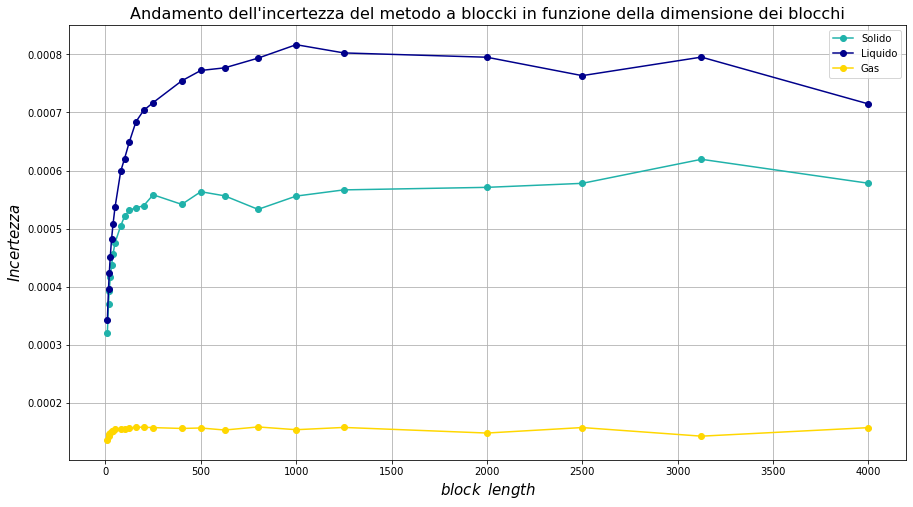

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
title = "Andamento dell'incertezza del metodo a bloccki in funzione della dimensione dei blocchi" 
ax.plot(Ls, sigma[0], color = "lightseagreen", label = "Solido", marker = 'o')
ax.plot(Ls, sigma[1], color = "darkblue", label = "Liquido", marker = 'o')
ax.plot(Ls, sigma[2], color = "gold", label = "Gas", marker = 'o')
ax.set_ylabel('$Incertezza$', fontsize = 15)
ax.set_xlabel('$block\,\,\,length$', fontsize = 15)
ax.legend()
ax.set_title (title, fontsize = 16)
ax.grid()


Osserviamo che inizialmente per tutte le fasi si osserva un aumento dell'incertezza che raggiunge poi un valore costante. 

# Exercise 07.3
Includere il calcolo della distribuzione radiale $g(r)$ come una funzinoe della distanza radiale tra le particelle, con $r \in \left[ 0; L/2\right]$ all'interno del codice MD/MC: calcolare il valore medio di $g(r)$ in ogni blocco e la media finale di $g(r)$ con la propria incertezza statistica in un file separato. 

## spiegazione dell'algoritmo 
La funzione di distribuzione radiale $g(r)$ descrive la probabilità di trovare una particella a una distanza r dalla particella presa come riferimento rispetto a quella che si avrebbe nel caso di un gas ideale con la stessa densità.

Essa, tenendo conto delle code di potenziale esterne al raggio di cut-off, permette di stimare le corrzioni da applicare ai valori calcolati di pressione ed energia potenziale. 

Se il raggio di cut-off $r_c$, la correzione all'energia potenziale per particella è data da 

$$\frac{\langle V \rangle_{tail}}{N} = 2\pi \rho N\int^{\infty}_0 r^2V(r)g(r) dr$$

Poichè le code si riferiscono a grandi distanze la distribuzione radiale tende a quella del gas perfetto quando $g(r)\approx 1 $, perciò la correzione diventa 

$$
\frac{\langle V \rangle_{tail}}{N} \approx \pi \rho N\int^{\infty}_{r_c} r^2V(r)dr \approx \frac{8\pi\epsilon\rho}{3r^3_c}\bigg(\frac1{3r^6_c} - 1\bigg)
$$

Per la pressione la correzione si trova applicando il teorema del viriale 

$$
\frac{\langle w \rangle_{tail}}{3N\epsilon} \approx \frac23\pi \rho \int^{\infty}_{r_c} drr^2 48\bigg[\bigg(\frac{\sigma}{r}\bigg)^{12} -\frac12\bigg(\frac{\sigma}{r}\bigg)^{6} \bigg] = \\
= 32 \pi \rho \bigg[\frac{1}{9r^9_c}-\frac{1}{6r_c^3}\bigg]
$$

Descrizione dell'algoritmo:

- Si considera una particella che si trova al centro del box 
- si cicla su ciascuna coppia di particelle 
- si valuta la distanza tra le particelle 
- si aggiunge +2 al bin dell'istogramma che include la distanza $dr$ misurata ta le paricelle

Dato che questo procedimento viene ripetuto per ogni step in ciascun blocco l'istogramma è stato normalizzato per il numero di step contenuto all'interno dei blocchi.

In [162]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

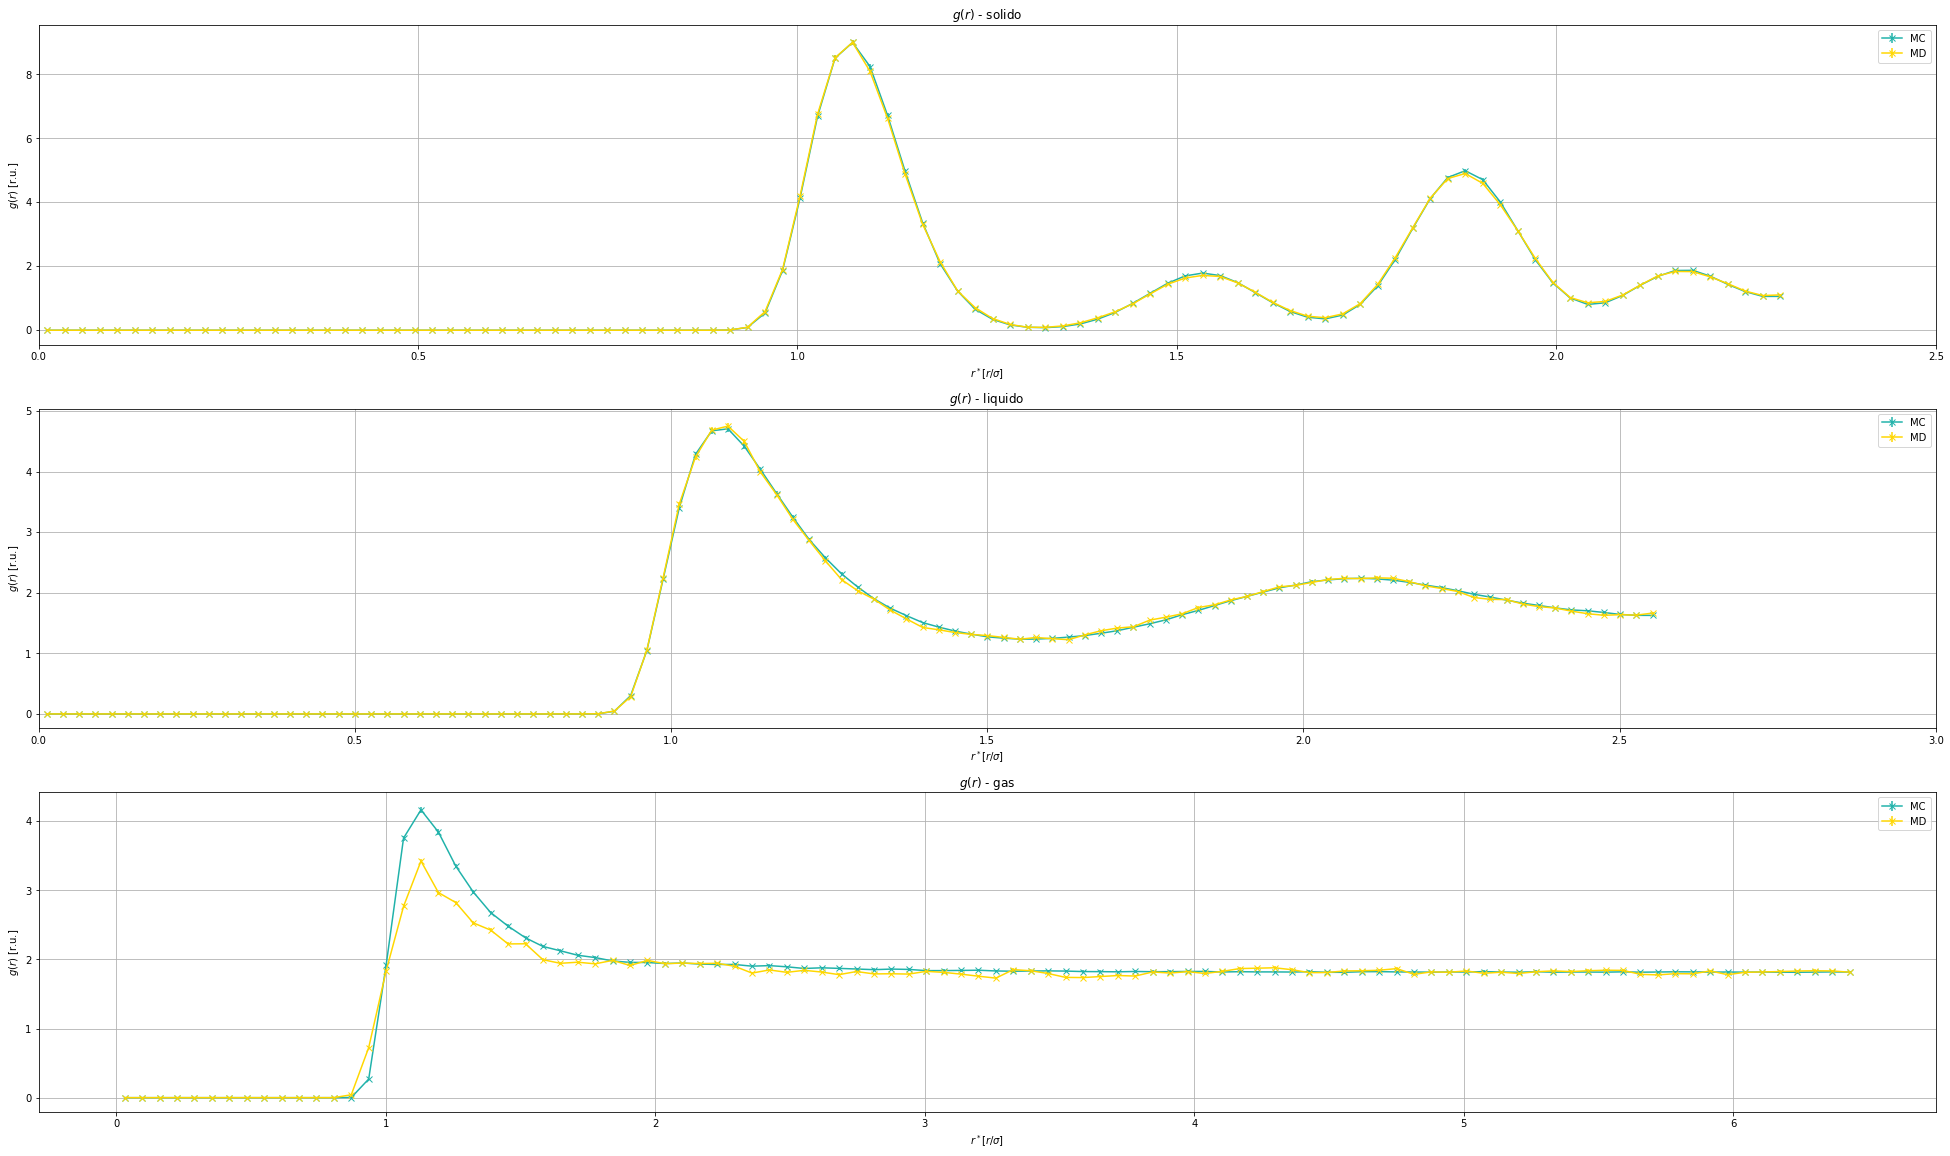

In [163]:
#Caricamento dati da file
r_sol_MC, g_Solid_MC, errSolid_MC = np.loadtxt("Exercise_7.3_7.4/gr_simple_solid_MC.dat", usecols=(0,1,2), unpack='true')
r_liq_MC, g_Liquid_MC, errLiquid_MC = np.loadtxt("Exercise_7.3_7.4/gr_simple_liquid_MC.dat", usecols=(0,1,2), unpack='true')
r_gas_MC, g_Gas_MC, errGas_MC = np.loadtxt("Exercise_7.3_7.4/gr_simple_gas_MC.dat", usecols=(0,1,2), unpack='true')

r_sol_MD, g_Solid_MD, errSolid_MD = np.loadtxt("./Exercise_7.3_7.4/gr_simple_solid_MD.dat", usecols=(0,1,2), unpack='true')
r_liq_MD, g_Liquid_MD, errLiquid_MD = np.loadtxt("./Exercise_7.3_7.4/gr_simple_liquid_MD.dat", usecols=(0,1,2), unpack='true')
r_gas_MD, g_Gas_MD, errGas_MD = np.loadtxt("./Exercise_7.3_7.4/gr_simple_gas_MD.dat", usecols=(0,1,2), unpack='true')

#Preparazione plot
fig, axs = plt.subplots(3, 1, figsize=(34, 20), sharey=False,tight_layout=False)

axs[0].errorbar(r_sol_MC, g_Solid_MC, yerr = errSolid_MC, marker = 'x', color = 'lightseagreen', label = "MC")
axs[1].errorbar(r_liq_MC, g_Liquid_MC, yerr = errLiquid_MC, marker = 'x', color = "lightseagreen", label = "MC")
axs[2].errorbar(r_gas_MC, g_Gas_MC, yerr = errGas_MC, marker = 'x', color = 'lightseagreen', label = "MC")

axs[0].errorbar(r_sol_MD, g_Solid_MD, yerr = errSolid_MD, marker = 'x', color = 'gold', label = "MD")
axs[1].errorbar(r_liq_MD, g_Liquid_MD, yerr = errLiquid_MD, marker = 'x', color = "gold", label = "MD")
axs[2].errorbar(r_gas_MD, g_Gas_MD, yerr = errGas_MD, marker = 'x', color = "gold", label = "MD")

axs[0].set(xlabel='$r^*[r/\sigma]$', xlim = (0,2.5), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - solido')
axs[1].set(xlabel='$r^*[r/\sigma]$', xlim = (0,3), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - liquido')
axs[2].set(xlabel='$r^*[r/\sigma]$', ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - gas')

axs[0].legend()
axs[1].legend()
axs[2].legend()

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

plt.show()



Osserviamo uno stesso andamento sia applicando il metodo Molecolar Dynamics che applicando l'algoritmo di Metropolis. 


# Exercise 07.4
Come upgrade del codice MC, equilibrare e svolgere una simulazione MC tramite il modello di Lennard-Jones di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

mostrare i valori medi ottenuti e le incertezze per
- energia potenziale per particella $U/N$
- la pressione $P$ 
- la funzione di distribuzione radiale $g(r)$ in unità standard di SI 

e comparare i risultati con quelli ottenuti con il codice di Dinamica Molecolare (Esercitazione 4)

## Soluzione
### Equilibrazione
Come abbiamo visto nella prima parte dell'esercizio, è necessario attuare un certo numero di step per raggiungere l'equilibrazione. procediamo quindi con l'evolvere il nostro sistema per un certo numero n = 3000 prima di svolgere il resto delle considerazioni. 

In [164]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Solido 


##### Quantità termodinamiche 

Stampiamo i risultati per l'energia potenziale del sistema e della pressione del sistema, per ciascuna fase e distinguendo tra i due diversi metodi, tramite la simulazione della Molecolar Dynamycs (MD) e tramite un algoritmo Monte Carlo (MC) che applica l'algoritmo di metropolis per simulare l'evoluzione del sistema. 
Ci aspettiamo che i risultati utilizzando i due metodi convergano. 

In [165]:
#dizionario colori md e mc 
mc_md_color = {"MC":"#a30000", "MD":"#726da8"}

In [166]:
x_pot_MC, pot_ave_MC, pot_prog_MC, pot_err_MC = np.loadtxt("Exercise_7.3_7.4/output_epot_solid_MC.dat", usecols=(0, 1, 2, 3), unpack='true')
x_pres_MC, pres_ave_MC, pres_prog_MC, pres_err_MC = np.loadtxt("Exercise_7.3_7.4/output_pres_solid_MC.dat", usecols=(0, 1, 2, 3), unpack='true')

x_pot_MD, pot_ave_MD, pot_prog_MD, pot_err_MD = np.loadtxt("Exercise_7.3_7.4/output_epot_solid_MD.dat", usecols=(0, 1, 2, 3), unpack='true')
x_pres_MD, pres_ave_MD, pres_prog_MD, pres_err_MD = np.loadtxt("Exercise_7.3_7.4/output_epot_solid_MD.dat", usecols=(0, 1, 2, 3), unpack='true')

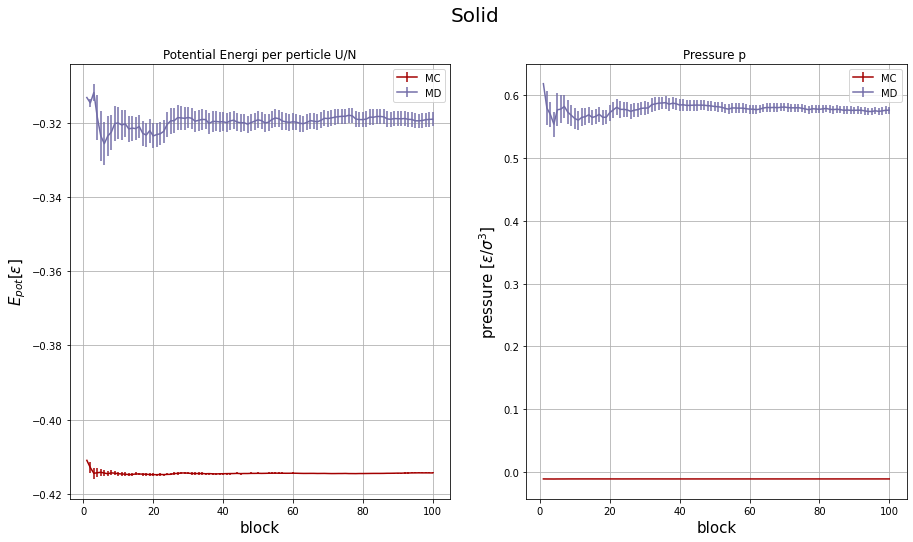

In [174]:
fig, (epot, pres) = plt.subplots(1, 2, figsize=(15, 8))
title = "Solid" 
fig.suptitle(title, fontsize = 20)

# energia potenziale 
epot.errorbar(x_pot_MC, pot_prog_MC,yerr = pot_err_MC,  label = "MC", color = mc_md_color["MC"])
epot.errorbar(x_pot_MD, pot_prog_MD,yerr = pot_err_MD,  label = "MD", color = mc_md_color["MD"])
epot.set_xlabel('block', fontsize = 15 ) 
epot.set_ylabel('$E_{pot} [\epsilon$]', fontsize = 15)
#x_test, pot_ave_test, pot_prog_test, pot_err_test = np.loadtxt("Exercise_7.3_7.4/Results/output_pres_solid_MD.dat", usecols=(0, 1, 2, 3), unpack='true')

#epot.errorbar(x_test,pot_prog_test, yerr=  pot_err_test)
epot.legend()
epot.set_title("Potential Energi per perticle U/N")
epot.grid()

pres_prog_MD = -pres_prog_MD 
pres.errorbar(x_pres_MC, pres_prog_MC,yerr = pres_err_MC, label = "MC", color = mc_md_color["MC"])
pres.errorbar(x_pres_MD, pres_prog_MD,yerr = pres_err_MD, label = "MD", color = mc_md_color["MD"])
pres.legend()
pres.set_xlabel('block', fontsize = 15 ) 
pres.set_ylabel("pressure [$\epsilon / \sigma^3 $]", fontsize = 15)
pres.set_title("Pressure p ")
pres.grid()


### Fase Liquida

In [168]:
x_pot_MC, pot_ave_MC, pot_prog_MC, pot_err_MC = np.loadtxt("Exercise_7.3_7.4/output_epot_liquid_MC.dat", usecols=(0, 1, 2, 3), unpack='true')
x_pres_MC, pres_ave_MC, pres_prog_MC, pres_err_MC = np.loadtxt("Exercise_7.3_7.4/output_pres_liquid_MC.dat", usecols=(0, 1, 2, 3), unpack='true')

x_pot_MD, pot_ave_MD, pot_prog_MD, pot_err_MD = np.loadtxt("Exercise_7.3_7.4/output_epot_liquid_MD.dat", usecols=(0, 1, 2, 3), unpack='true')
x_pres_MD, pres_ave_MD, pres_prog_MD, pres_err_MD = np.loadtxt("Exercise_7.3_7.4/output_pres_liquid_MD.dat", usecols=(0, 1, 2, 3), unpack='true')

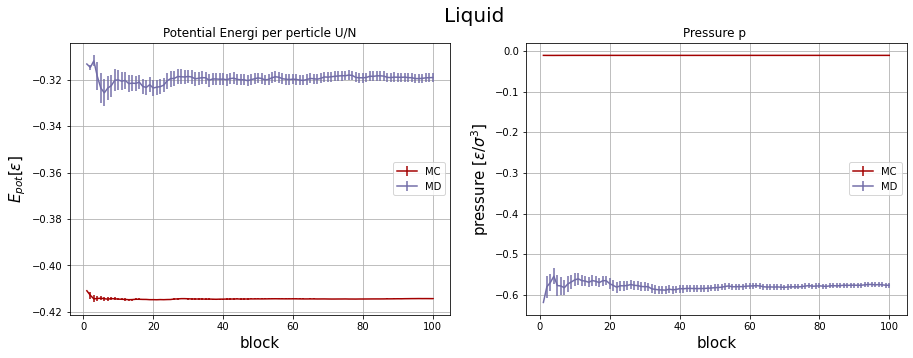

In [173]:
fig, (epot, pres) = plt.subplots(1, 2, figsize=(15, 5))
title = "Liquid" 
fig.suptitle(title, fontsize = 20)

# energia potenziale 
epot.errorbar(x_pot_MC, pot_prog_MC,yerr = pot_err_MC,  label = "MC", color = mc_md_color["MC"])
epot.errorbar(x_pot_MD, pot_prog_MD,yerr = pot_err_MD,  label = "MD", color = mc_md_color["MD"])
epot.legend()
epot.set_xlabel('block', fontsize = 15 ) 
epot.set_ylabel('$E_{pot} [\epsilon$]', fontsize = 15)
epot.set_title("Potential Energi per perticle U/N")
epot.grid()
#epot.set_xlim([0, 20])

pres.errorbar(x_pres_MC, pres_prog_MC,yerr = pres_err_MC, label = "MC", color = mc_md_color["MC"])
pres.errorbar(x_pres_MD, pres_prog_MD,yerr = pres_err_MD, label = "MD", color = mc_md_color["MD"])
pres.legend()
pres.set_xlabel('block', fontsize = 15 ) 
pres.set_ylabel("pressure [$\epsilon / \sigma^3 $]", fontsize = 15)
pres.set_title("Pressure p ")
pres.grid()


## Fase Gassosa 

In [170]:
x_pot_MC, pot_ave_MC, pot_prog_MC, pot_err_MC = np.loadtxt("Exercise_7.3_7.4/output_epot_gas_MC.dat", usecols=(0, 1, 2, 3), unpack='true')
x_pres_MC, pres_ave_MC, pres_prog_MC, pres_err_MC = np.loadtxt("Exercise_7.3_7.4/output_pres_gas_MC.dat", usecols=(0, 1, 2, 3), unpack='true')

x_pot_MD, pot_ave_MD, pot_prog_MD, pot_err_MD = np.loadtxt("Exercise_7.3_7.4/output_epot_gas_MD.dat", usecols=(0, 1, 2, 3), unpack='true')


x_pres_MD, pres_ave_MC, pres_prog_MD, pres_err_MD = np.loadtxt("Exercise_7.3_7.4/output_pres_gas_MD.dat", usecols=(0, 1,  2, 3), unpack='true')

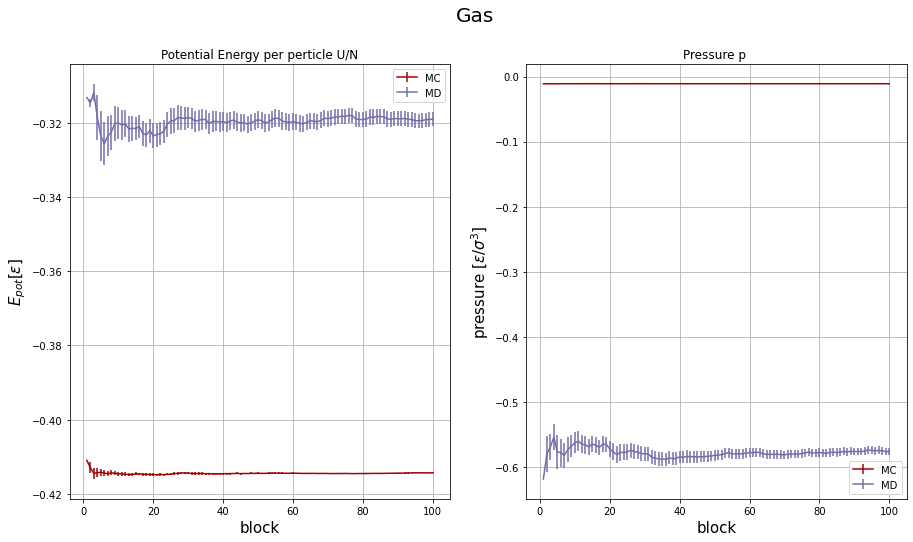

In [172]:
fig, (epot, pres) = plt.subplots(1, 2, figsize=(15, 8))
title = "Gas" 
fig.suptitle(title, fontsize = 20)

# energia potenziale 
epot.errorbar(x_pot_MC, pot_prog_MC,yerr = pot_err_MC,  label = "MC", color = mc_md_color["MC"])
epot.errorbar(x_pot_MD, pot_prog_MD,yerr = pot_err_MD,  label = "MD", color = mc_md_color["MD"])
epot.legend()
epot.set_xlabel('block', fontsize = 15 ) 
epot.set_ylabel('$E_{pot} [\epsilon$]', fontsize = 15)
epot.set_title("Potential Energy per perticle U/N")
epot.grid()

pres.errorbar(x_pres_MC, pres_prog_MC,yerr = pres_err_MC, label = "MC", color = mc_md_color["MC"])
pres.errorbar(x_pres_MD, pres_prog_MD,yerr = pres_err_MD, label = "MD", color = mc_md_color["MD"])
pres.legend()
pres.set_xlabel('block', fontsize = 15 ) 
pres.set_ylabel("pressure [$\epsilon / \sigma^3 $]", fontsize = 15)
pres.set_title("Pressure p ")
pres.grid()


## Commento ai risultati 
Osserviamo che i due metodi non ci portano ad avere delle stime esattamente identiche e osserviamo una discrepanza tra i due metodi. Tuttavia la stima può comunque considerarsi una buona stima dell'andamento del sistema. 

Il motivo per cui non osserviamo una precisa convergenza tra i due metodi possono essere così spiegati. 
In entrambi metodi sono state fatte delle modifiche sui parametri iniziali per poter correttamente simulare il sistema. 
- MD : come abbiamo spegato nell'esercitazione 4, è stato necessario modificare la temperatura di partenza del sistema per far in modo che il sistema evolvesse e raggiungesse la temperatura a cui si voleva effettivamente simulare il sistema. Questo cambiamento è stato svolto osservando la variazione della temperatura del sistema e modificando la temperatura di input di conseguenza. Per motivi di tempo non è sempre stato possibile raggiungere una perfetta coincidenza alla temperatura desiderata, per cui questa sorgente di errori potrebbe aver portato il sistema a convergere ad un diverso valore di energia / pressione

- MC: l'algoritmo Montecarlo non prevede invece un evoluzione della temperatura del sistema ma all'inizio è stato necessario modificare il valore di delta del sistema per ottenere un valore di acceptance rate adeguato. Anche in questo caso la stima potrebbe essere influenzata da una scelta non perfettamente adeguata del parametro. 

Posti questi Caveat, si ritiene si possano considerare soddisfacenti i risultati, il che rappresenta una dimostrazione della correttezza della meccanica statistica. 